In [ ]:
!nvidia-smi

Sun Apr  2 11:35:02 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!wget https://raw.githubusercontent.com/riya0920/DeepLearning_TensorFlow/main/helper_functions.py

--2023-04-02 11:35:03--  https://raw.githubusercontent.com/riya0920/DeepLearning_TensorFlow/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10302 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.06K  --.-KB/s    in 0s      

2023-04-02 11:35:04 (89.8 MB/s) - ‘helper_functions.py.1’ saved [10302/10302]



In [ ]:
from helper_functions import unzip_data, walk_through_dir, plot_loss_curves,create_tensorboard_callback,view_random_image,compare_historys

In [ ]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip


--2023-04-02 11:35:04--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.128, 74.125.20.128, 108.177.98.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip.1’

101_food_classes_10 100%[===================>]   1.51G   236MB/s    in 7.5s    

2023-04-02 11:35:12 (206 MB/s) - ‘101_food_classes_10_percent.zip.1’ saved [1625420029/1625420029]



In [ ]:
unzip_data("101_food_classes_10_percent.zip")

In [ ]:
train_dir = "101_food_classes_10_percent/train/"
test_dir = "101_food_classes_10_percent/test/"

In [ ]:
walk_through_dir("101_food_classes_10_percent/train")

There are 101 directories and 0 images in '101_food_classes_10_percent/train'
There are 0 directories and 75 images in '101_food_classes_10_percent/train/macarons'
There are 0 directories and 75 images in '101_food_classes_10_percent/train/cannoli'
There are 0 directories and 75 images in '101_food_classes_10_percent/train/clam_chowder'
There are 0 directories and 75 images in '101_food_classes_10_percent/train/pancakes'
There are 0 directories and 75 images in '101_food_classes_10_percent/train/creme_brulee'
There are 0 directories and 75 images in '101_food_classes_10_percent/train/fried_calamari'
There are 0 directories and 75 images in '101_food_classes_10_percent/train/risotto'
There are 0 directories and 75 images in '101_food_classes_10_percent/train/pad_thai'
There are 0 directories and 75 images in '101_food_classes_10_percent/train/falafel'
There are 0 directories and 75 images in '101_food_classes_10_percent/train/poutine'
There are 0 directories and 75 images in '101_food_c

In [ ]:
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                            label_mode = "categorical",
                                                                            image_size = (224,224))
test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(test_dir,

                                                                           label_mode = "categorical",
                                                                           image_size = (224,224),
                                                                           shuffle = False)

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


['3718433.jpg']
Image shape: (512, 512, 3)


array([[[ 37,  59,  47],
        [ 36,  58,  46],
        [ 34,  56,  44],
        ...,
        [ 30,  45,  40],
        [ 28,  43,  38],
        [ 26,  41,  34]],

       [[ 36,  58,  46],
        [ 36,  58,  46],
        [ 35,  57,  45],
        ...,
        [ 30,  45,  40],
        [ 29,  44,  39],
        [ 28,  43,  38]],

       [[ 36,  58,  46],
        [ 36,  58,  46],
        [ 36,  58,  46],
        ...,
        [ 31,  46,  41],
        [ 31,  46,  41],
        [ 31,  46,  41]],

       ...,

       [[168, 172, 201],
        [167, 171, 200],
        [168, 172, 201],
        ...,
        [  9,   9,   7],
        [ 10,  10,   8],
        [ 10,  10,   8]],

       [[168, 172, 201],
        [167, 171, 200],
        [168, 172, 201],
        ...,
        [  8,   8,   6],
        [  9,   9,   7],
        [  9,   9,   7]],

       [[171, 175, 204],
        [170, 174, 203],
        [170, 174, 203],
        ...,
        [  8,   8,   6],
        [  8,   8,   6],
        [  7,   7,   5]]

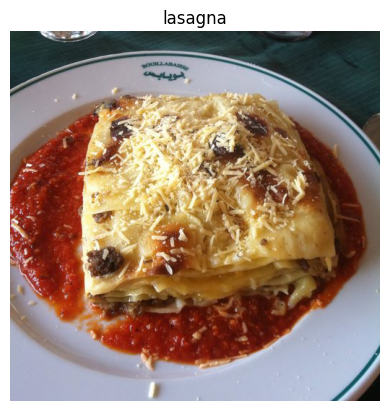

In [ ]:
view_random_image(train_dir, "lasagna")

In [ ]:
checkpoint_path = "101_ten_percent_scaling_up_models.ckpt"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path,
                                               save_weights_only = True,
                                               monitor = "val_accuracy",
                                               save_freq = "epoch",
                                               save_best_only = False)

In [ ]:
from tensorflow.keras.layers.experimental import preprocessing
data_augmentation = tf.keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomZoom(0.2)
])

In [ ]:
from keras.api._v2.keras.layers import GlobalAveragePooling2D
#Building the base model
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape = (224,224,3))
x = data_augmentation(inputs)
x = base_model(x,training = False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(101,activation="softmax")(x)

model_1 = tf.keras.Model(inputs,outputs)

model_1.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
                metrics = ["accuracy"])

In [ ]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, None, None, 3)     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 101)               129381    
                                                                 
Total params: 4,178,952
Trainable params: 129,381
Non-trainable params: 4,049,571
_____________________________________________

In [ ]:
history_1 = model_1.fit(train_data_10_percent,
            epochs = 5,
            validation_data = test_data_10_percent,
            validation_steps = int(0.15*len(test_data_10_percent)),
            callbacks = [create_tensorboard_callback("transfer_learning","Model_1_101_class"),
                         checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/Model_1_101_class/20230402-113538
Epoch 1/5
237/237 [==============================] - 116s 418ms/step - loss: 4.4657 - accuracy: 0.0418 - val_loss: 4.1716 - val_accuracy: 0.1067
Epoch 2/5
237/237 [==============================] - 72s 301ms/step - loss: 4.0261 - accuracy: 0.1790 - val_loss: 3.8251 - val_accuracy: 0.2423
Epoch 3/5
237/237 [==============================] - 66s 275ms/step - loss: 3.6756 - accuracy: 0.2875 - val_loss: 3.5528 - val_accuracy: 0.3236
Epoch 4/5
237/237 [==============================] - 62s 259ms/step - loss: 3.3931 - accuracy: 0.3486 - val_loss: 3.3202 - val_accuracy: 0.3710
Epoch 5/5
237/237 [==============================] - 54s 227ms/step - loss: 3.1565 - accuracy: 0.3995 - val_loss: 3.1182 - val_accuracy: 0.4052


In [ ]:
model_1.evaluate(test_data_10_percent)

In [ ]:
#Fine tuning the model!!
base_model.trainable = True
for layer in base_model.layers[:-5]:
  layer.trainable = False


In [ ]:
model_1.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
                metrics = ["accuracy"])

In [ ]:
history_1_fine_tuning = model_1.fit(train_data_10_percent,
                                    epochs = 10,
                                    initial_epoch = 5,
                                    steps_per_epoch = len(train_data_10_percent),
                                    validation_data = test_data_10_percent,
                                    validation_steps = int(0.15*len(test_data_10_percent)),
                                    callbacks = [create_tensorboard_callback("transfer_learning","Model_1_finetuned"),
                                                 checkpoint_callback])

In [ ]:
model_1.evaluate(test_data_10_percent)

In [ ]:
compare_historys(history_1,history_1_fine_tuning)

In [ ]:
model_1.predict(test_data_10_percent)

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/06_101_food_class_10_percent_saved_big_dog_model.zip

In [ ]:
unzip_data("06_101_food_class_10_percent_saved_big_dog_model.zip")

In [ ]:
loaded_data = tf.keras.models.load_model("06_101_food_class_10_percent_saved_big_dog_model")

In [ ]:
loaded_data.evaluate(test_data_10_percent)

In [ ]:
pred_probs = loaded_data.predict(test_data_10_percent)

In [ ]:
pred_probs[0].argmax()
len(pred_probs)

In [ ]:
for i in range(0,10):
  print(pred_probs[i].argmax(), " ")

In [ ]:
pred_classes = pred_probs.argmax(axis=1)

# How do they look?
pred_classes[:10]



In [ ]:
y_labels = []
for images, labels in test_data_10_percent.unbatch(): # unbatch the test data and get images and labels
  y_labels.append(labels.numpy().argmax()) # append the index which has the largest value (labels are one-hot)
y_labels[:10] # check what they look like (unshuffled)

In [ ]:

# Get accuracy score by comparing predicted classes to ground truth labels
from sklearn.metrics import accuracy_score
sklearn_accuracy = accuracy_score(y_labels, pred_classes)
sklearn_accuracy

In [ ]:
from helper_functions import make_confusion_matrix

In [ ]:
make_confusion_matrix(y_true = y_labels,
                      y_pred = pred_classes,
                      classes = test_data_10_percent.class_names,
                      figsize = (128,128),
                      text_size = 20)

NameError: ignored